In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("/content/diabetes.csv")

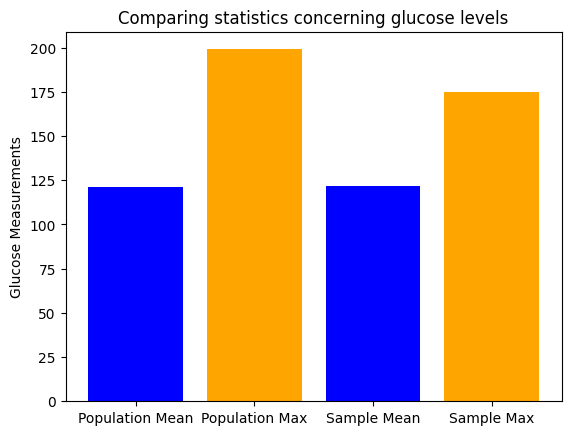

In [4]:

np.random.seed(765)


sample = data.sample(25)

p_mean_glucose = data['Glucose'].mean()
p_max_glucose = data['Glucose'].max()

s_mean_glucose = sample['Glucose'].mean()
s_max_glucose = sample['Glucose'].max()


# Create a bar chart for comparison
l = ['Population Mean','Population Max','Sample Mean','Sample Max']
v = [p_mean_glucose, p_max_glucose, s_mean_glucose, s_max_glucose]

plt.bar(l, v, color=['blue', 'orange', 'blue', 'orange'])
plt.title('Comparing statistics concerning glucose levels')
plt.ylabel('Glucose Measurements')
plt.show()


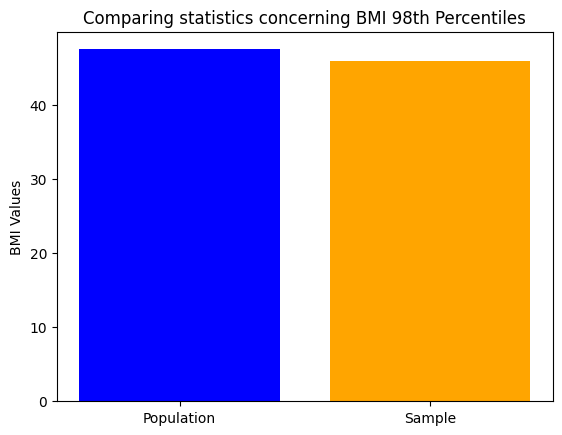

In [5]:
p_percentile = np.percentile(data['BMI'], 98)
s_percentile = np.percentile(sample['BMI'], 98)

l = ['Population', 'Sample']
v = [p_percentile, s_percentile]

plt.bar(l, v, color=['blue', 'orange'])
plt.title('Comparing statistics concerning BMI 98th Percentiles')
plt.ylabel('BMI Values')
plt.show()

In [6]:

bootstrap_samples = 500
sample_size = 150


bootstrap_means = np.zeros(bootstrap_samples)
bootstrap_std_devs = np.zeros(bootstrap_samples)
bootstrap_percentiles = np.zeros(bootstrap_samples)


for i in range(bootstrap_samples):
    bootstrap_sample = data['BloodPressure'].sample(sample_size, replace=True)
    bootstrap_means[i] = bootstrap_sample.mean()
    bootstrap_std_devs[i] = bootstrap_sample.std()
    bootstrap_percentiles[i] = np.percentile(bootstrap_sample, 98)


p_mean = data['BloodPressure'].mean()
p_std_dev = data['BloodPressure'].std()
p_percentile = np.percentile(data['BloodPressure'], 98)



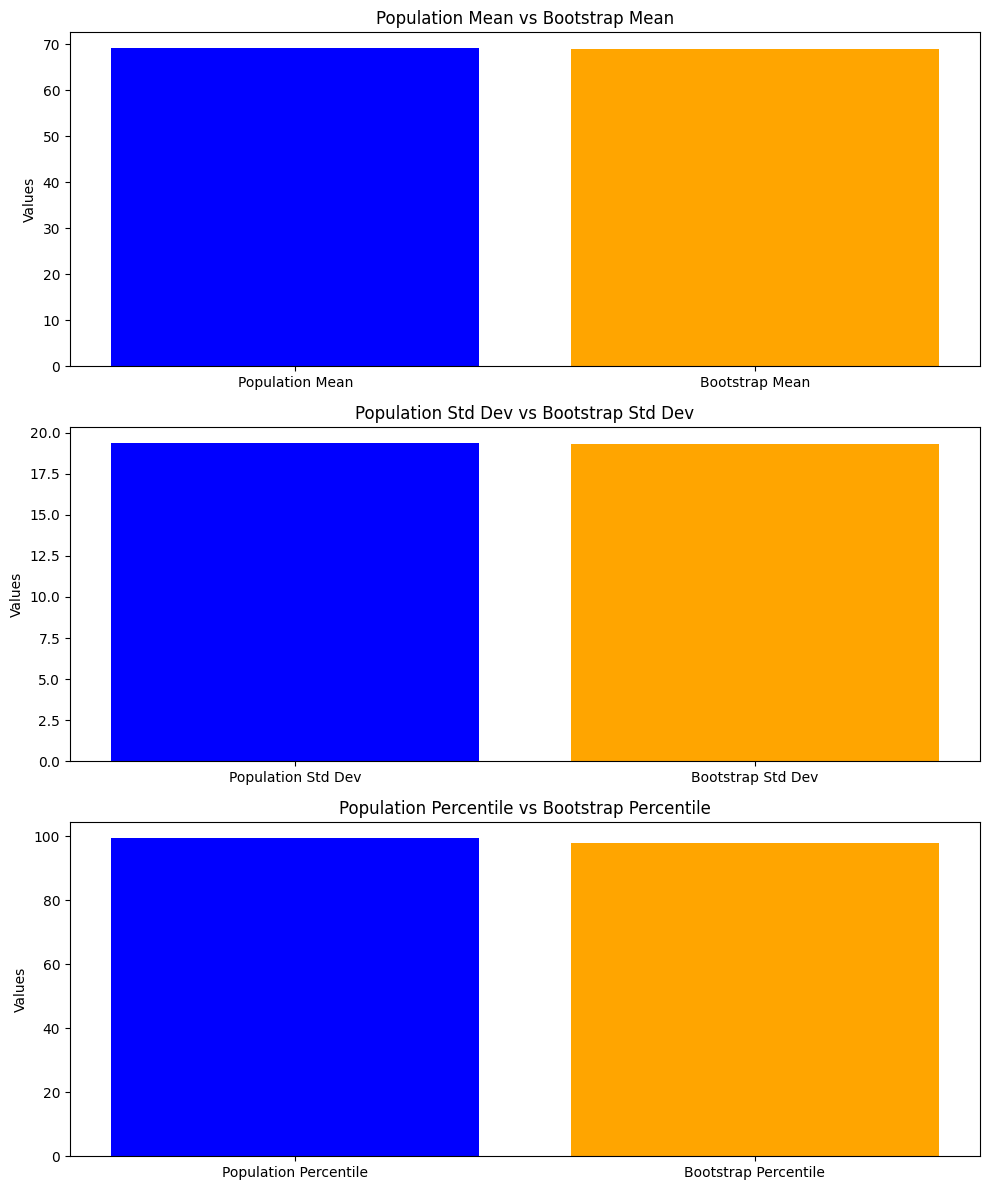

In [8]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12))


axs[0].bar(['Population Mean', 'Bootstrap Mean'], [p_mean, np.mean(bootstrap_means)], color=['blue', 'orange'])
axs[0].set_ylabel('Values')
axs[0].set_title('Population Mean vs Bootstrap Mean')


axs[1].bar(['Population Std Dev', 'Bootstrap Std Dev'], [p_std_dev, np.mean(bootstrap_std_devs)], color=['blue', 'orange'])
axs[1].set_ylabel('Values')
axs[1].set_title('Population Std Dev vs Bootstrap Std Dev')


axs[2].bar(['Population Percentile', 'Bootstrap Percentile'], [p_percentile, np.mean(bootstrap_percentiles)], color=['blue', 'orange'])
axs[2].set_ylabel('Values')
axs[2].set_title('Population Percentile vs Bootstrap Percentile')

plt.tight_layout()
plt.show()